In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%matplotlib inline

In [2]:
# read the files
files = list(sorted(glob.glob('images/*jpeg')))[::-1]
n_files = len(files)

ims = []
for f in files:
    z = cv2.imread(f)
    ims.append(z)

In [3]:
h, w, _ = z.shape

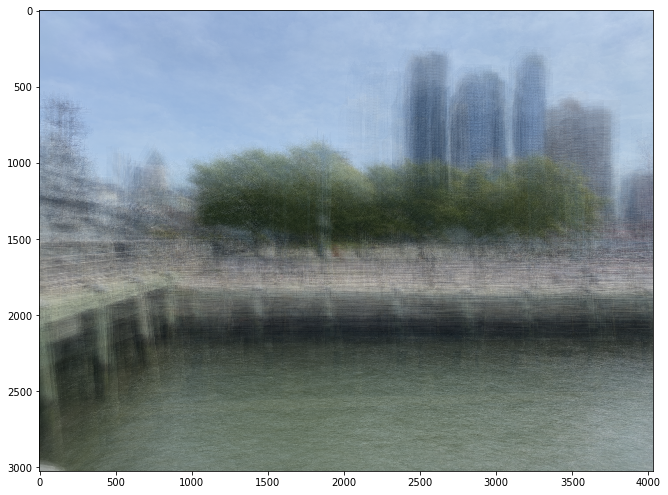

In [4]:
z = np.array(ims).astype('float').mean(0).astype('uint8')

fig, ax = plt.subplots(figsize=(11, 11))
ax.imshow(z[:, :, ::-1])
plt.show()

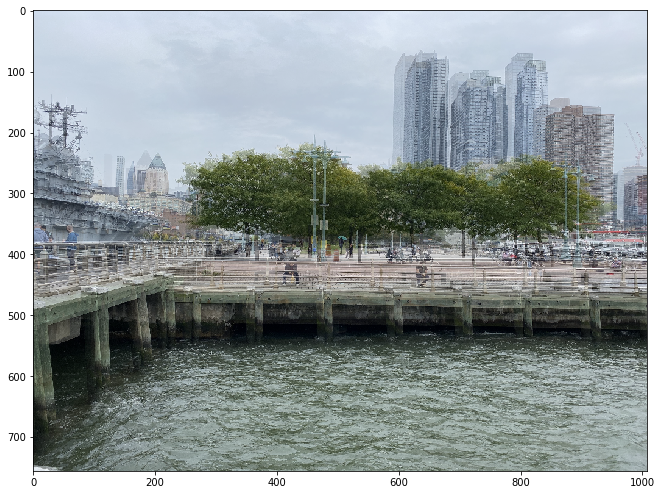

In [5]:
z0 = ims[0].astype('float')[::4, ::4]
zi = ims[1].astype('float')[::4, ::4]
#z = np.array(ims[:2]).astype('float').mean(0).astype('uint8')
z = ((z0 + zi)/2).astype('uint8')

fig, ax = plt.subplots(figsize=(11, 11))
ax.imshow(z[:, :, ::-1])
plt.show()

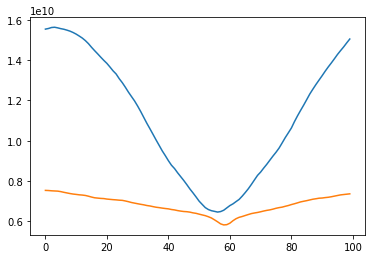

In [7]:
pad = 100
step = 2

err_x = []
err_y = []

for i in range(-pad, pad, step):
    e = ((z0[pad:-pad] - zi[pad+i:-pad+i])**2).sum()
    err_x.append(e)

for j in range(-pad, pad, step):
    e = ((z0[:, pad:-pad] - zi[:, pad+j:-pad+j])**2).sum()
    err_y.append(e)
    
fig, ax = plt.subplots()
ax.plot(err_x)
ax.plot(err_y)
plt.show()

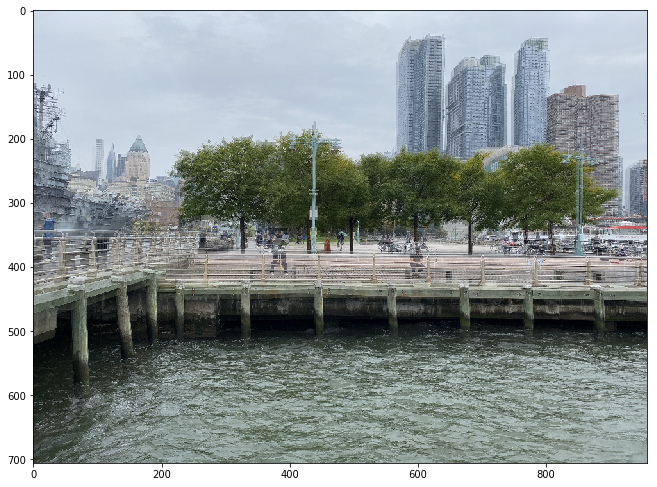

In [8]:
i0 = slice(pad, -pad, 4)

imin = int(np.argmin(err_x))
jmin = int(np.argmin(err_y))

ix = slice(pad+imin, -pad+imin, 4)
jx = slice(pad+jmin, -pad+jmin, 4)

z0 = ims[0].astype('float')[i0, i0]
zi = ims[1].astype('float')[ix, jx]
#z = np.array(ims[:2]).astype('float').mean(0).astype('uint8')
z = ((z0 + zi)/2).astype('uint8')

fig, ax = plt.subplots(figsize=(11, 11))
ax.imshow(z[:, :, ::-1])
plt.show()

In [9]:
z0

array([[[230., 214., 201.],
        [230., 214., 201.],
        [230., 214., 201.],
        ...,
        [243., 225., 214.],
        [244., 226., 215.],
        [244., 226., 215.]],

       [[229., 213., 200.],
        [229., 213., 200.],
        [229., 213., 200.],
        ...,
        [243., 225., 214.],
        [244., 226., 215.],
        [244., 226., 215.]],

       [[229., 213., 200.],
        [229., 213., 200.],
        [229., 213., 200.],
        ...,
        [244., 226., 215.],
        [244., 226., 215.],
        [244., 226., 215.]],

       ...,

       [[ 43.,  49.,  38.],
        [ 57.,  63.,  52.],
        [ 40.,  46.,  35.],
        ...,
        [184., 182., 164.],
        [185., 183., 165.],
        [185., 183., 165.]],

       [[ 40.,  46.,  35.],
        [ 44.,  50.,  39.],
        [ 37.,  43.,  32.],
        ...,
        [188., 184., 166.],
        [190., 186., 168.],
        [189., 187., 169.]],

       [[ 52.,  58.,  47.],
        [ 47.,  53.,  42.],
        [ 54.,  